<a href="https://colab.research.google.com/github/sukyoujeong/Python/blob/main/3%EB%8B%A8%EC%9B%90_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###03-1.k-최근접 이웃 회귀

지도 학습 알고리즘
- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류
- 회귀 : 임의의 어떤 숫자 예측

k-최근접 이웃 분류 알고리즘 :
1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 샘플들의 클래스를 확인
3. 다수의 클래스를 새로운 샘플의 클래스로 예측

k-최근접 이웃 회귀 알고리즘 :
1. 예측하려는 샘플에 가장 가까운 샘플 k개 선택
2. 이웃한 샘플의 타깃은 클래스가아닌 **임의의 수치**
3. 수치들의 평균을 구하면 샘플의 예측 타깃값 나옴!


In [2]:
import numpy as np      #배열...
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

하나의 특성을 사용하기때문에

특성데이터를 x축에 놓고 타깃데이터를 y축에 놓음

무게를 알아내는거니까 무게가 y축

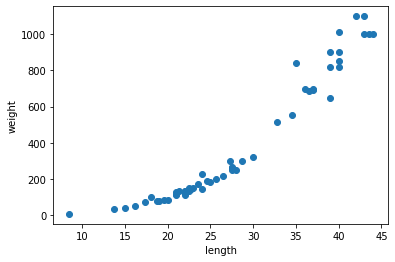

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

사이킷런 훈련세트는 2차원 배열이어야함..

파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타냄

In [5]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [7]:
train_input = train_input.reshape(-1,1)     #배열의 크기 자동으로 지정, 나머지 원소 개수로 모두 채우라는 의미,배열의 전체 원소 개수 안외워도 조앙
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [9]:
print(knr.score(test_input,test_target))

0.9928094061010639


평가 점수는 **결정계수, R^2** 으로 부름

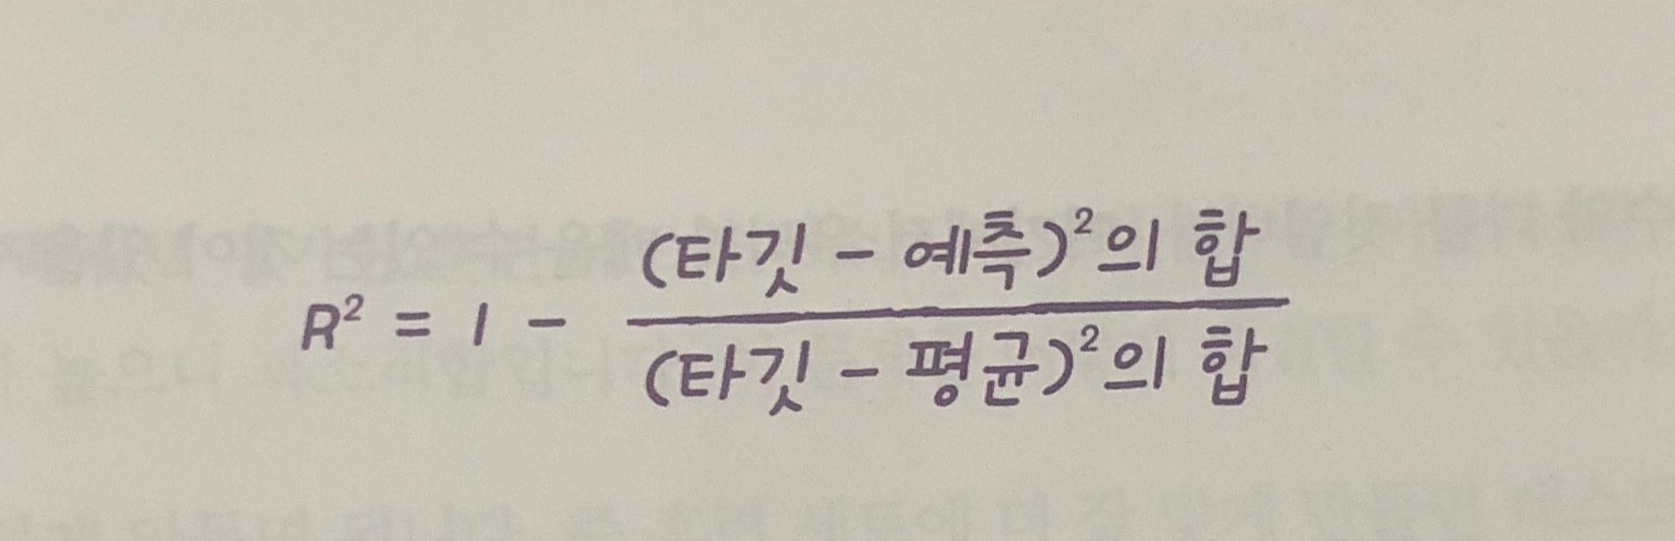

타깃의 평균정도를 예측하면(분자 분모가 비슷해져있음) 0에 가까워지고

예측이 타깃에 가까워지면 (분자가 0에 가까워져) 1에 가까운 값이 됨

In [10]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있음

In [11]:
print(knr.score(train_input, train_target))

0.9698823289099255


훈련세트에서 점수가 좋았는데 테스트 세트에서는 점수가 나쁘다면 

훈련세트에 **과대적합** 되었다고 함.

즉 훈련세트에만 잘 맞는 모델이라 테스트 세트와 실전 투입하면 잘 동작 x

반대로 훈련세트보다 테스트 세트의 점수가 더 높거나 둘다 낮으면

훈련세트에 **과소적합**되었다고 한다.

과소적합이 이루어지는 이유는 크기가 작아서.....

과소 적합을 해결하려면

모델을 조금더 복잡하게 만드렁...

훈련세트에 더 잘맞게 만들면 테스트 세트의 점수는 조금 낮아질 것임

k-최근접 이웃 알고리즘으로 모델을 복잡하게 만드는 방법은 이웃의 갯수 k를 줄이기

이웃의 개수를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해지고

개수를 늘리면 데이터 전반의 일반적인 패턴을 따른다.


In [12]:
#이웃의 개수를 3으로 설정
knr.n_neighbors=3       #기본값은 5

#모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))



0.9804899950518966


In [13]:
print(knr.score(test_input, test_target))

0.974645996398761


### 03-2.선형회귀

In [14]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [15]:
from sklearn.model_selection import train_test_split

# 훈련세트와 테스트 세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors =3)

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [18]:
print(knr.predict([[50]]))

[1033.33333333]


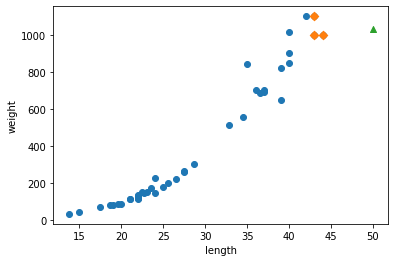

In [19]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes],marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
print(np.mean(train_target[indexes]))       # 이웃 샘플의 타깃의 평균....

1033.3333333333333


In [22]:
print(knr.predict([[100]]))

[1033.33333333]


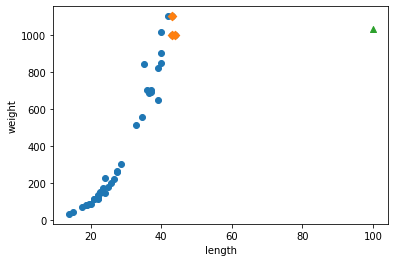

In [23]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes],marker='D')

# 100cm 농어 데이터
plt.scatter(100,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**선형회귀**는 널리 사용되는 대표적인 회귀 알고리즘

선형에서 알 수 있듯 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다
print(lr.predict([[50]]))

[1241.83860323]


직선을 그리려면 기울기와 절편을 찾아야함

그거를 lr 객체의 coef_ 와 intercept_ 속성에 저장

In [27]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


머신러닝 알고리즘이 찾은 값 : 모델 파라미터

최적의 모델 파라미터를 찾는 것 -> 이를 모델 기반 학습이라 부름

k-최근접 이웃에는 모델 파라미터가 없음

훈련세트를 저장하는 것이 훈련의 전부였기 때문에 사례 기반 학습이라 함

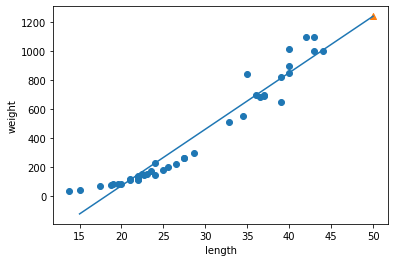

In [29]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
print(lr.score(train_input, train_target))  # 훈련 세트
print(lr.score(test_input, test_target))    # 테스트 세트

0.9398463339976039
0.8247503123313558


In [31]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [32]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [33]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [34]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


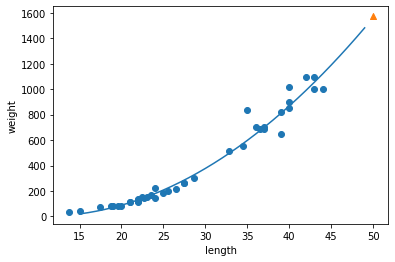

In [36]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15,50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point +116.05)

# 50cm 농어 데이터
plt.scatter(50,1574,marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


###03-3. 특성 공학과 규제

**다중 회귀** : 여러개의 특성을 사용한 선형회귀


기존의 특성을 사용해서 새로운 특성을 뽑아내는 작업을 특성공학이라함

In [38]:
import pandas as pd     # pd는 관례적으로 사용하는 판다스의 별칭입니다
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [39]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [40]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state =42
)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


polynomialFeatures 클래스는

각특성을 제곱한 항 추가, 서로 곱한항 추가

무게 = a x 길이 + b x 높이 + c x 두께 + d x 1

특성은 (길이, 높이, 두께, 1) 이 되는데

사이킷런의 선형 모델은 자동으로 절편을 추가

In [44]:
poly = PolynomialFeatures(include_bias = False)     #절편을 위한 항 제거
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [45]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [47]:
poly.get_feature_names()        # 특성 확인

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [48]:
test_poly = poly.transform(test_input)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [51]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [53]:
poly = PolynomialFeatures(degree=5, include_bias =False)        # 5제곱까지 특성을 출력
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [54]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [56]:
print(lr.score(test_poly, test_target))     #특성의 갯수를 크게 늘리면 훈련세트에 과대적합 되므로 테스트 세트에서는 ...ㅠ

-144.40579242335605


**규제**는 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방

즉 모델이 훈련세트에 과대적합되지 않도록 하는것...

선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)를 작게 만듦

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)       # 꼭 훈련세트로 학습한 변환기를 사용해서 테스트세트까지 변환해야함!!!!!

선형 회귀 모델에 규제를 추가한 모델을
- 릿지 : 계수를 제곱한 값을 기준 (더 선호)
- 랏쏘 : 계수의 절댓값을 기준 (아예 0으로 만들 수도 있음)

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [60]:
print(ridge.score(test_scaled,test_target))

0.9790693977615398


alpha 매개변수로 규제의 강도 조절

alpha 값이 크면 규제 강도가 세지므로 

계수 값을 더 줄이고 조금 더 과소 적합 되도록 유도

alpha 값이 작으면 계수를 줄이는 역할이 줄어들고

선형 회귀 모델과 유사 -> 과대적합될 가능성 커짐

적절한 alpha 값을 찾는 방법은 alpha 값에 대한 R^2 값 그래프 그리기

훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha

In [61]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [62]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha = alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

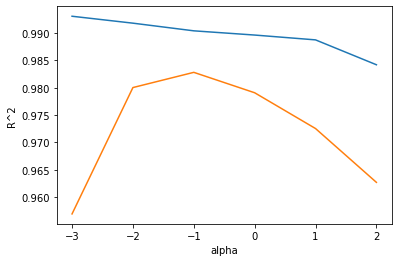

In [63]:
plt.plot(np.log10(alpha_list),train_score)      #no.log()는 e를 밑으로 하는 자연로그
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [64]:
ridge = Ridge(alpha =0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927
